<a href="https://colab.research.google.com/github/pavaninaiduvamisetti/Python-projects/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
#from feature_engine.outliers import Winsorizer
import matplotlib.pyplot as plt
from scipy import stats


from sklearn.tree import DecisionTreeClassifier as DT

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
dia=pd.read_csv("Diabetes.csv")
dia

FileNotFoundError: [Errno 2] No such file or directory: 'Diabetes.csv'

In [15]:
dia.info()

#######################################################

NameError: name 'dia' is not defined

In [ ]:

dia.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years)
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [14]:
dia.columns=["Pregencies","Glucose",
             "BloodPressure","SkinThickness",
             "Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]

NameError: name 'dia' is not defined

In [ ]:
dia.isna().sum()

,0
Pregencies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


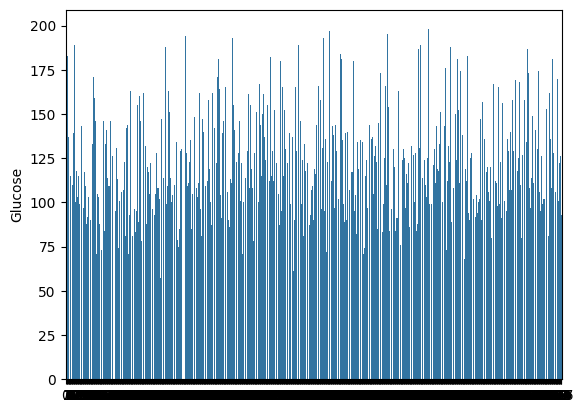

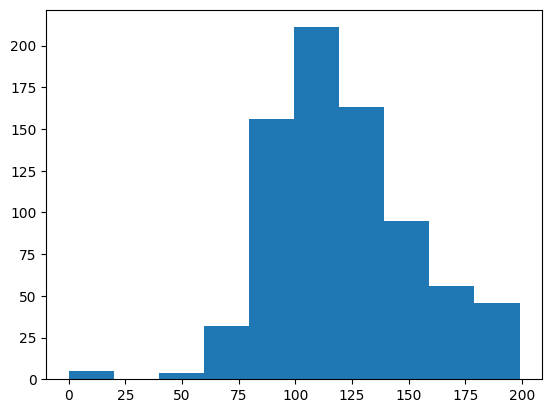

In [ ]:
########################## Univariate analysis #############################################

def univarite_analysis(data):
    sns.barplot(data)
    plt.show()
    plt.hist(data)
    plt.show()

univarite_analysis(dia["Glucose"])


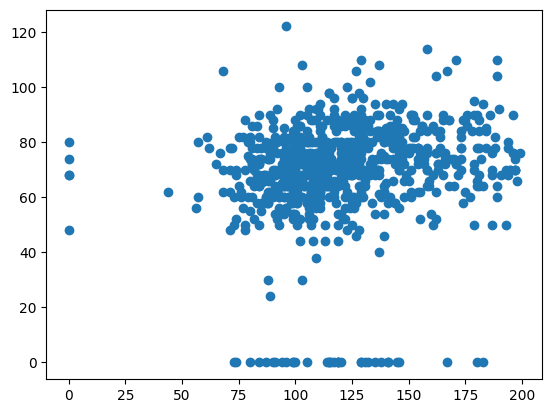

In [ ]:
############################## Bivariate analysis ##########################################
def bivariate_analysis(x,y):
    plt.scatter(x,y)
    plt.show()

bivariate_analysis(dia["Glucose"], dia["BloodPressure"])

In [ ]:
#################################################################################################
########################## Data preprocessing #########################################
def check_outliers(data):
    q1=data.quantile(0.25)
    q2=data.quantile(0.50)
    q3=data.quantile(0.75)
    print(q1)
    print(q2)
    print(q3)
    IQR=q3-q1
    print(IQR)
    lower_limit=q1-1.5*IQR
    upper_limit=q3+1.5*IQR
    outlier=[]
    for x in data:
        if (x<lower_limit) or ((x>upper_limit)):
            outlier.append(x)
    print('outlier is ',outlier)

In [ ]:
def plot_outlier(data):
    sns.boxplot(data);plt.title("new box plot");plt.show();

In [ ]:
def winsorizer(method,fold,tail_p,var,data):
    winsorizer=Winsorizer(capping_method=method,fold=fold,tail=tail_p,variables=[var])
    trans=winsorizer.fit_transform(data)
    print(winsorizer.left_tail_caps_,winsorizer.right_tail_caps_)
    return (trans)

99.0
117.0
140.25
41.25
outlier is  [0, 0, 0, 0, 0]


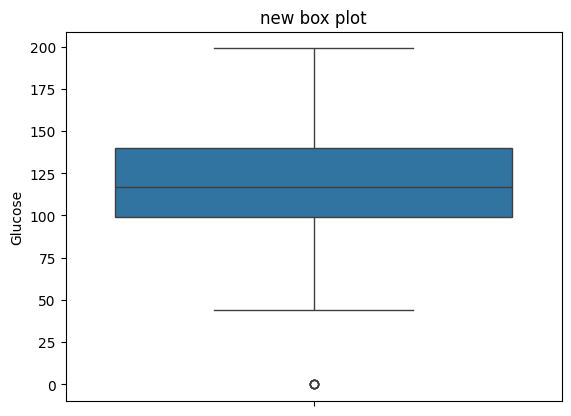

62.0
72.0
80.0
18.0
outlier is  [0, 0, 30, 110, 0, 0, 0, 0, 108, 122, 30, 0, 110, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 108, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 110, 0, 24, 0, 0, 0, 0, 114, 0, 0, 0]


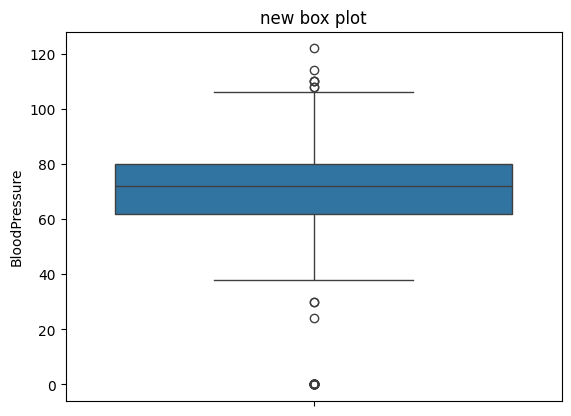

0.0
23.0
32.0
32.0
outlier is  [99]


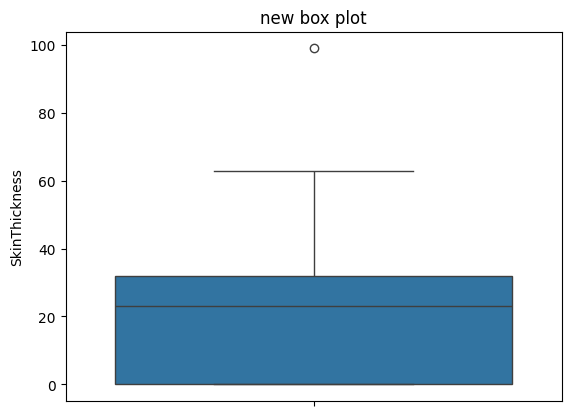

0.0
30.5
127.25
127.25
outlier is  [543, 846, 342, 495, 325, 485, 495, 478, 744, 370, 680, 402, 375, 545, 360, 325, 465, 325, 415, 579, 474, 328, 480, 326, 330, 600, 321, 440, 540, 480, 335, 387, 392, 510]


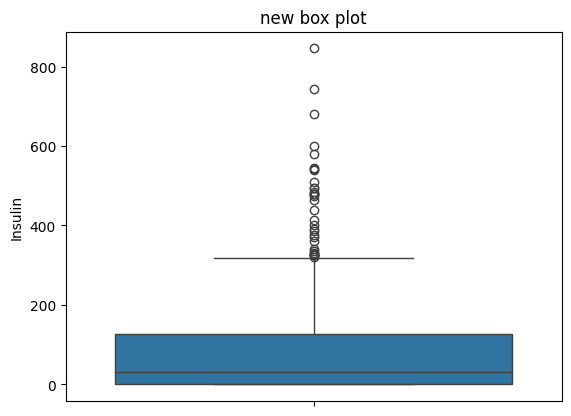

27.3
32.0
36.6
9.3
outlier is  [0.0, 0.0, 0.0, 0.0, 53.2, 55.0, 0.0, 67.1, 52.3, 52.3, 52.9, 0.0, 0.0, 59.4, 0.0, 0.0, 57.3, 0.0, 0.0]


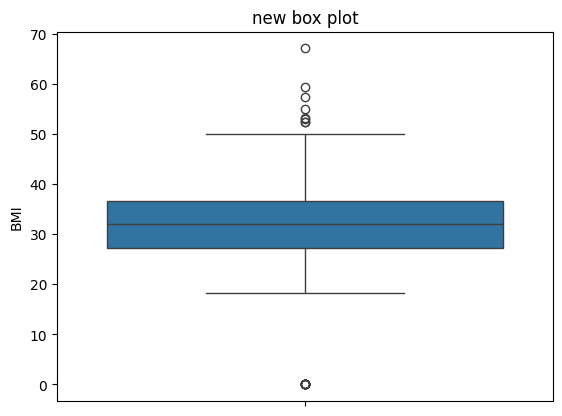

0.24375
0.3725
0.62625
0.38249999999999995
outlier is  [2.288, 1.441, 1.39, 1.893, 1.781, 1.222, 1.4, 1.321, 1.224, 2.329, 1.318, 1.213, 1.353, 1.224, 1.391, 1.476, 2.137, 1.731, 1.268, 1.6, 2.42, 1.251, 1.699, 1.258, 1.282, 1.698, 1.461, 1.292, 1.394]


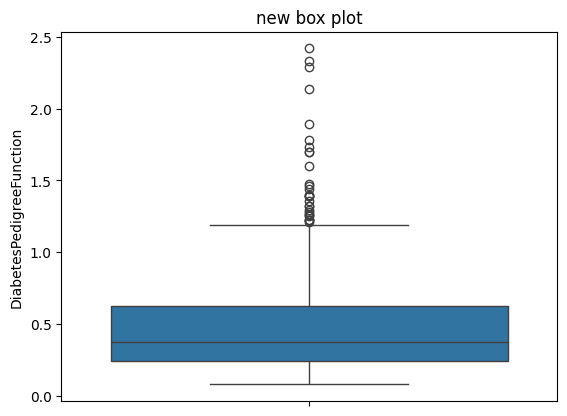

In [ ]:
cols=["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction"]
for i in cols:
    check_outliers(dia[i])
    plot_outlier(dia[i])

#for i in cols:
    #dia[i]=winsorizer("iqr", 1.5, "both", i, dia[[i]])

In [17]:
##########################################################################################
################################### EDA #################################################

def EDA(data):
    print("Mean is: ")
    print(data.mean())

    print("Median is: ")
    print(data.median())
    print("Mode is: ")
    print(stats.mode(data))

    #second moment bussiness decision
    print("variance is: ")
    print(data.var())
    print("Standard deviation is: ")
    print(data.std())
    print("Range is: ")
    print(data.max()-data.min())

    #third moment bussiness decision
    print("Skewness is: ")
    print(data.skew())

    #fourth business moment
    print("Kurtosis is: ")
    print(data.kurt())

EDA(dia.iloc[:,0:7])

NameError: name 'dia' is not defined

In [ ]:
def scaling(data,s_type):
    if s_type=="stand":
        data=(data-data.mean())/(data.std())
        return data
    elif s_type=="sc":
        sc=StandardScaler()
        return sc.fit_transform(data)
    elif s_type=="norm":
        return (data-data.min())/(data.max()-data.min())


x_norm=scaling(dia.iloc[:,0:-1],"norm")


x_sc=scaling(dia.iloc[:,0:-1],"sc")


x_stand=scaling(dia.iloc[:,0:-1],"stand")

x_norm.describe()


x_stand.describe()

y=dia.iloc[:,-1]

In [ ]:
def decisionTree(x,y,t_size):
    train_X,test_X,train_Y,test_Y=train_test_split(x,y,test_size=t_size)
    dia_model=DT(criterion = 'entropy')
    dia_model.fit(train_X,train_Y)
    test_pred=dia_model.predict(test_X)
    print(pd.crosstab(test_pred,test_Y))
    print("Test Accuracy: ",np.mean(test_pred==test_Y)*100)
    print("Test Error: ",np.mean(test_pred!=test_Y)*100)

    train_pred=dia_model.predict(train_X)
    print("Cross tab:",pd.crosstab(train_pred,train_Y))
    print("Train Accuracy: ",np.mean(train_pred==train_Y)*100)
    print("Train Error: ",np.mean(train_pred!=train_Y)*100)
########################normalisation ##########################
decisionTree(x_norm, y, 0.2)

################## standard scaler #############################

decisionTree(x_sc, y, 0.2)

###################### standardisation #########################

decisionTree(x_stand, y, 0.2)

Outcome  NO  YES
row_0           
NO       84   18
YES      15   37
Test Accuracy:  78.57142857142857
Test Error:  21.428571428571427
Cross tab: Outcome   NO  YES
row_0            
NO       401    0
YES        0  213
Train Accuracy:  100.0
Train Error:  0.0
Outcome  NO  YES
row_0           
NO       71   28
YES      26   29
Test Accuracy:  64.93506493506493
Test Error:  35.064935064935064
Cross tab: Outcome   NO  YES
row_0            
NO       403    0
YES        0  211
Train Accuracy:  100.0
Train Error:  0.0
Outcome  NO  YES
row_0           
NO       77   22
YES      28   27
Test Accuracy:  67.53246753246754
Test Error:  32.467532467532465
Cross tab: Outcome   NO  YES
row_0            
NO       395    0
YES        0  219
Train Accuracy:  100.0
Train Error:  0.0


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
#from feature_engine.outliers import Winsorizer
import matplotlib.pyplot as plt
from scipy import stats


from sklearn.tree import DecisionTreeClassifier as DT

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [13]:
dia=pd.read_csv("Diabetes.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Diabetes.csv'

In [10]:
dia.columns=["Pregencies","Glucose",
             "BloodPressure","SkinThickness",
             "Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]

NameError: name 'dia' is not defined

In [18]:
def scaling(data,s_type):
    if s_type=="stand":
        data=(data-data.mean())/(data.std())
        return data
    elif s_type=="sc":
        sc=StandardScaler()
        return sc.fit_transform(data)
    elif s_type=="norm":
        return (data-data.min())/(data.max()-data.min())

In [20]:
x_sc=scaling(dia.iloc[:,0:-1],"sc")

NameError: name 'dia' is not defined

In [7]:

y=dia.iloc[:,-1]

NameError: name 'dia' is not defined

In [8]:
def decisionTree(x,y,t_size):
    train_X,test_X,train_Y,test_Y=train_test_split(x,y,test_size=t_size)
    dia_model=DT(criterion = 'entropy')
    dia_model.fit(train_X,train_Y)
    test_pred=dia_model.predict(test_X)
    print(pd.crosstab(test_pred,test_Y))
    print("Test Accuracy: ",np.mean(test_pred==test_Y)*100)
    print("Test Error: ",np.mean(test_pred!=test_Y)*100)

    train_pred=dia_model.predict(train_X)
    print("Cross tab:",pd.crosstab(train_pred,train_Y))
    print("Train Accuracy: ",np.mean(train_pred==train_Y)*100)
    print("Train Error: ",np.mean(train_pred!=train_Y)*100)

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [5]:
predictors=x_sc
target=y
train_x,test_x,train_x,test_y = train_test_split(predictors, target, test_size=0.2, random_state=0)
rf_clf = RandomForestClassifier(n_estimators=200,
                                max_depth=8,
                                min_samples_split=10,
                                min_samples_leaf=3,
                                max_features="sqrt",
                                bootstrap=True,
                                n_jobs=-1,
                                random_state=42)
rf_clf.fit(train_x, train_y)

NameError: name 'x_sc' is not defined